## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
#del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
import warnings
warnings.filterwarnings("ignore")

## The LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [7]:
df['returns'] = df.market_value.pct_change(1)*100

## ARIMA(1,1,1)

In [8]:
model_ar1_i1_ma1 = ARIMA(df.market_value, order=(1,1,1))
results_ar1_i1_ma1 = model_ar1_i1_ma1.fit()
results_ar1_i1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Sat, 19 Mar 2022   AIC                          55215.333
Time:                        11:50:15   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

## Residuals of the ARIMA(1,1,1)

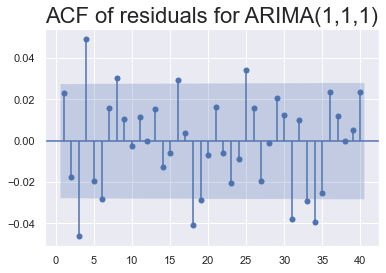

In [10]:
df['res_ar1_i1_ma1'] = results_ar1_i1_ma1.resid
sgt.plot_acf(df.res_ar1_i1_ma1[1:], zero=False, lags=40)
plt.title("ACF of residuals for ARIMA(1,1,1)", size=22)
plt.show()

## Higher-Lag ARIMA Models

In [11]:
model_ar1_i1_ma2 = ARIMA(df.market_value, order=(1,1,2))
results_ar1_i1_ma2 = model_ar1_i1_ma2.fit()
model_ar1_i1_ma3 = ARIMA(df.market_value, order=(1,1,3))
results_ar1_i1_ma3 = model_ar1_i1_ma3.fit()
model_ar2_i1_ma1 = ARIMA(df.market_value, order=(2,1,1))
results_ar2_i1_ma1 = model_ar2_i1_ma1.fit()
model_ar3_i1_ma1 = ARIMA(df.market_value, order=(3,1,1))
results_ar3_i1_ma1 = model_ar3_i1_ma1.fit()
model_ar3_i1_ma2 = ARIMA(df.market_value, order=(3,1,2))
results_ar3_i1_ma2 = model_ar3_i1_ma2.fit(start_ar_lags=5)

In [13]:
print("ARIMA(1,1,1): \t LL=", results_ar1_i1_ma1.llf, "\t AIC=", results_ar1_i1_ma1.aic)
print("ARIMA(1,1,2): \t LL=", results_ar1_i1_ma2.llf, "\t AIC=", results_ar1_i1_ma2.aic)
print("ARIMA(1,1,3): \t LL=", results_ar1_i1_ma3.llf, "\t AIC=", results_ar1_i1_ma3.aic)
print("ARIMA(2,1,1): \t LL=", results_ar2_i1_ma1.llf, "\t AIC=", results_ar2_i1_ma1.aic)
print("ARIMA(3,1,1): \t LL=", results_ar3_i1_ma1.llf, "\t AIC=", results_ar3_i1_ma1.aic)
print("ARIMA(3,1,2): \t LL=", results_ar3_i1_ma2.llf, "\t AIC=", results_ar3_i1_ma2.aic)

ARIMA(1,1,1): 	 LL= -27603.66641277481 	 AIC= 55215.33282554962
ARIMA(1,1,2): 	 LL= -27600.08186312693 	 AIC= 55210.16372625386
ARIMA(1,1,3): 	 LL= -27590.424032581985 	 AIC= 55192.84806516397
ARIMA(2,1,1): 	 LL= -27599.807487857503 	 AIC= 55209.614975715005
ARIMA(3,1,1): 	 LL= -27592.055371701197 	 AIC= 55196.110743402394
ARIMA(3,1,2): 	 LL= -27590.660808981247 	 AIC= 55195.321617962494


In [14]:
print("LLR test p-value = " + str(LLR_test(model_ar1_i1_ma2, model_ar1_i1_ma3)))

LLR test p-value = 0.0


In [15]:
print("LLR test p-value = " + str(LLR_test(model_ar1_i1_ma1, model_ar1_i1_ma3, DF=2)))

LLR test p-value = 0.0


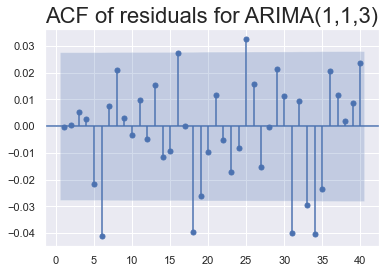

In [16]:
df['res_ar1_i1_ma3'] = results_ar1_i1_ma3.resid
sgt.plot_acf(df.res_ar1_i1_ma3[1:], zero=False, lags=40)
plt.title("ACF of residuals for ARIMA(1,1,3)", size=22)
plt.show()

In [20]:
model_ar5_i1_ma1 = ARIMA(df.market_value, order=(5,1,1))
results_ar5_i1_ma1 = model_ar5_i1_ma1.fit()
model_ar6_i1_ma3 = ARIMA(df.market_value, order=(6,1,3))
results_ar6_i1_ma3 = model_ar6_i1_ma3.fit()

In [21]:
print("ARIMA(1,1,3): \t LL=", results_ar1_i1_ma3.llf, "\t AIC=", results_ar1_i1_ma3.aic)
print("ARIMA(5,1,1): \t LL=", results_ar5_i1_ma1.llf, "\t AIC=", results_ar5_i1_ma1.aic)
print("ARIMA(6,1,3): \t LL=", results_ar6_i1_ma3.llf, "\t AIC=", results_ar6_i1_ma3.aic)

ARIMA(1,1,3): 	 LL= -27590.424032581985 	 AIC= 55192.84806516397
ARIMA(5,1,1): 	 LL= -27586.511888122335 	 AIC= 55189.02377624467
ARIMA(6,1,3): 	 LL= -27581.455478169595 	 AIC= 55184.91095633919


In [22]:
print("LLR test p-value = " + str(LLR_test(model_ar1_i1_ma3, model_ar6_i1_ma3, DF=5)))

LLR test p-value = 0.018


In [23]:
print("LLR test p-value = " + str(LLR_test(model_ar5_i1_ma1, model_ar6_i1_ma3, DF=3)))

LLR test p-value = 0.117


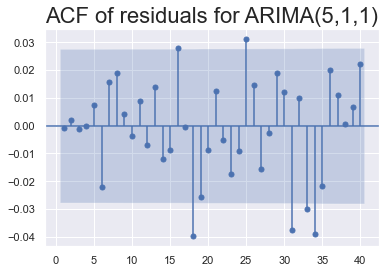

In [24]:
df['res_ar5_i1_ma1'] = results_ar5_i1_ma1.resid
sgt.plot_acf(df.res_ar5_i1_ma1[1:], zero=False, lags=40)
plt.title("ACF of residuals for ARIMA(5,1,1)", size=22)
plt.show()

## Models with Higher Levels of Integration

In [26]:
df['delta_prices'] = df.market_value.diff(1)

In [28]:
model_delta_ar1_i0_ma1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar1_i0_ma1 = model_delta_ar1_i0_ma1.fit()
results_delta_ar1_i0_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Sat, 19 Mar 2022   AIC                          55215.333
Time:                        12:39:31   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.delta_prices     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.delta_prices    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [29]:
sts.adfuller(df.delta_prices[1:])

(-32.244093495707475,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

## ARIMAX 

In [30]:
model_ar1_i1_ma1_Xspx = ARIMA(df.market_value, exog=df.spx, order=(1,1,1))
results_ar1_i1_ma1_Xspx = model_ar1_i1_ma1_Xspx.fit()
results_ar1_i1_ma1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Sat, 19 Mar 2022   AIC                          55217.112
Time:                        12:56:23   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5894      2.655     -0.222      0.824      -5.792       4.614
spx                      0.0011      0.002      0.452      0.652      -0.004       0.006
ar.L1.D.market_value     0.7462      0.070     10.602      0.000       0.608       0.884
ma.L1.D.market_value    -0.7923      0.064    -12.305      0.000      -0.918      -0.666
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3400           +0.0000j            1.3400            0.0000
MA.1            1.2622           +0.0000j            1.2622            0.0000
-----------------------------------------------------------------------------
"""

## SARIMAX

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [36]:
model_sarimax = SARIMAX(df.market_value, exog=df.spx, order=(1,0,1), seasonal_order=(2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.711
Date:                           Sat, 19 Mar 2022   AIC                          53439.422
Time:                                   13:07:02   BIC                          53485.072
Sample:                               01-07-1994   HQIC                         53455.418
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6999      0.035     76.788      0.000       2.631       2.769
ar.L1          0.9998      0.000   2160.981      0.000       0.999       1.001
ma.L1         -0.3098      0.009    -32.900      0.000      -0.328      -0.291
ar.S.L5        0.9642      0.011     87.326      0.000       0.943       0.986
ar.S.L10       0.0354      0.010      3.430      0.001       0.015       0.056
ma.S.L5       -0.9987      0.006   -177.887      0.000      -1.010      -0.988
sigma2      2441.8094     28.419     85.921      0.000    2386.108    2497.510
===================================================================================
Ljung-Box (L1) (Q):                   1.63   Jarque-Bera (JB):              4206.60
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""